In [1]:
import os
import cv2

def label_images(root_folder):

    labeled_images = []
    class_counts = {}  # Initialize a dictionary to store class counts

    for folder_name in ["buffalo", "elephants", "giraffes", "rhinos", "zebras"]:
        folder_path = os.path.join(root_folder, folder_name)
        if folder_name == "buffalo":
            label = 0
        elif folder_name == "elephants":
            label = 1
        elif folder_name == "giraffes":
            label = 2
        elif folder_name == "rhinos":
            label = 3
        elif folder_name == "zebras":
            label = 4

        class_counts[folder_name] = 0  # Initialize the count for the current class

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    labeled_images.append((img, label))
                    class_counts[folder_name] += 1  # Increment the count for the current class
            except Exception as e:
                print(f"Error reading image {img_path}: {e}")

    # Print the class counts
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

    return labeled_images

root_folder = "/content/drive/MyDrive/WildAfrica/WildAfrica"
labeled_data = label_images(root_folder)

buffalo: 179 images
elephants: 119 images
giraffes: 27 images
rhinos: 110 images
zebras: 49 images


At first glance there is a significant class imbalance, with the 'Giraffe' and 'Zebra' classes having the fewest images and 'Buffalo' class having the most.

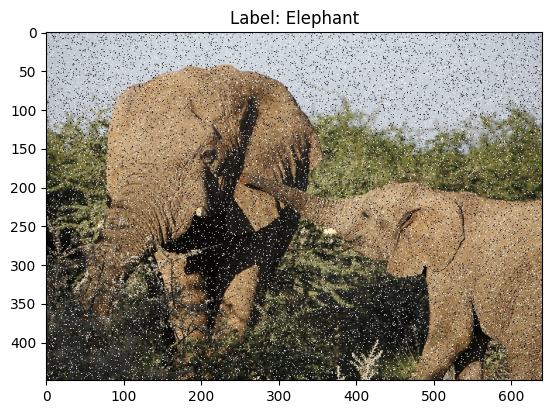

Image shape: (449, 640, 3)


In [2]:
import matplotlib.pyplot as plt

image, label = labeled_data[200]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if label == 0:
    plt.title("Label: Buffalo")
elif label == 1:
    plt.title("Label: Elephant")
elif label == 2:
    plt.title("Label: Giraffe")
elif label == 3:
    plt.title("Label: Rhino")
elif label == 4:
    plt.title("Label: Zebra")
plt.show()
# printing the image shape
print(f"Image shape: {image.shape}")

For this project I have decided not to convert my images to greyscale because:
*   Converting to grayscale can reduce the amount of information available to the model. Color can be a good visual cue for distinguishing between the different animals.
*   We are using a Convolutional Neural Network model for our classification problem. CNN's are designed to extract features from color images, so they can leverage the color information to improve classification accuracy.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 773ms/step - accuracy: 0.2310 - loss: 147.7444 - val_accuracy: 0.2474 - val_loss: 2.2298
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 959ms/step - accuracy: 0.4224 - loss: 2.1596 - val_accuracy: 0.4124 - val_loss: 1.8629
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 866ms/step - accuracy: 0.5344 - loss: 1.7288 - val_accuracy: 0.4639 - val_loss: 1.6778
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 928ms/step - accuracy: 0.5508 - loss: 1.3174 - val_accuracy: 0.3608 - val_loss: 1.9763
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 952ms/step - accuracy: 0.6014 - loss: 0.9673 - val_accuracy: 0.3918 - val_loss: 1.7667
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 816ms/step - accuracy: 0.7416 - loss: 0.6582 - val_accuracy: 0.4124 - val_loss: 1.9930
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 973ms/step - accuracy: 0.8127 - loss: 0.5084 - val_accuracy: 0.4330 - val_loss: 2.1798
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 798ms/step - accuracy: 0.9046 - loss: 0.3006 - val_ac

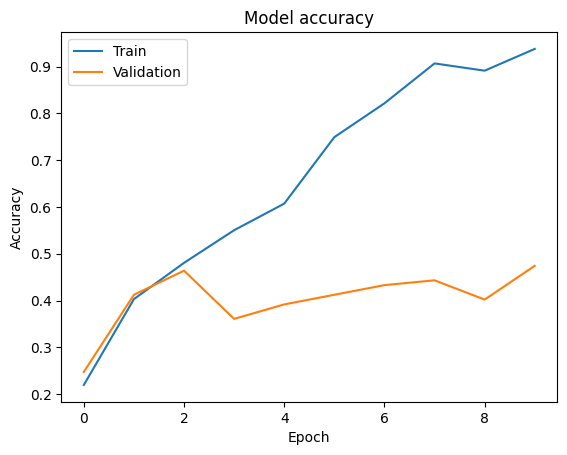

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from sklearn.model_selection import train_test_split

# Assuming your data is in the variables X and y
# where X is a NumPy array of image data and y is a NumPy array of labels

# if you use the load code from the tutorial this code should work for you with no issues- if you are uing your own method you will need to adopt the code below

X, y = zip(*labeled_data)  # Unzip the list of tuples into images (X) and labels (y) # change this to your dataframe name

# Step 2: Resize images to a consistent size
IMG_SIZE = 128  # Choose a desired size  # You can adjust the test_size parameter to control the proportion of data used for testing

X = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in X]

# Step 3: Convert list of images to a NumPy array
X = np.array(X)
y = np.array(y)    # Convert list of labels to a NumPy array

# Step 4: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, y_train: Training data and labels
# X_test, y_test: Testing data and labels



# Define the CNN model--- you will not need to adopt this code- dont change the models at all.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))  # Use IMG_SIZE here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

This is a plot visualizing the training and validation accuracy of the model after 10 iterations. The blue line represents the performance of the model on the training data. As expected, the model improves gradually after every iteration on the training set. The model however has a low test accuracy score and not only that, there is a big difference in the training and validation accuracy. These are signs that the model, when trained on our dataset without any preprocessing techniques, is overfitting. This means that it is only good at recognizing patterns in training data but does not perform well on unseen data.  

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # import the accuracy function

# Make predictions on the test set
y_pred = model.predict(X_test)# Predict the class probabilities for each image in the testing set using the trained model

y_pred_classes = np.argmax(y_pred, axis=1)# Extracts the most likely class label for each image from the predicted class probabilities

# Calculate accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred_classes)) # use the accuracy_score function to calculate the accuracy
print("Classification Report:", classification_report(y_test, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
Accuracy: 0.4742268041237113
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.63      0.63        38
           1       0.37      0.37      0.37        19
           2       0.00      0.00      0.00         5
           3       0.33      0.35      0.34        20
           4       0.42      0.53      0.47        15

    accuracy                           0.47        97
   macro avg       0.35      0.38      0.36        97
weighted avg       0.45      0.47      0.46        97



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


I decided to get a more detailed understanding of the model's performance by plotting a confusion matrix as well as generating a classification report. From the classification report, the model had a low overall accuracy. The model was most precise at correctly classifying 'Buffalo' and 'Zebra' classes. The low percision and recall values for the 'Giraffe' class means that it is missing many instances of this class and when it does identify a positive instance, it is often wrong. The highest F1-Score (the mean of percision and recall) was recorded for the 'Buffalo'. From the 'Support' metric, it is evident that we have an imbalanced dataset, attributed to the low number of samples in the other classes when compared to the number of samples from the 'Buffalo' class. This analysis gives us a better idea of some of the techniques we can use to improve the performance of our model.

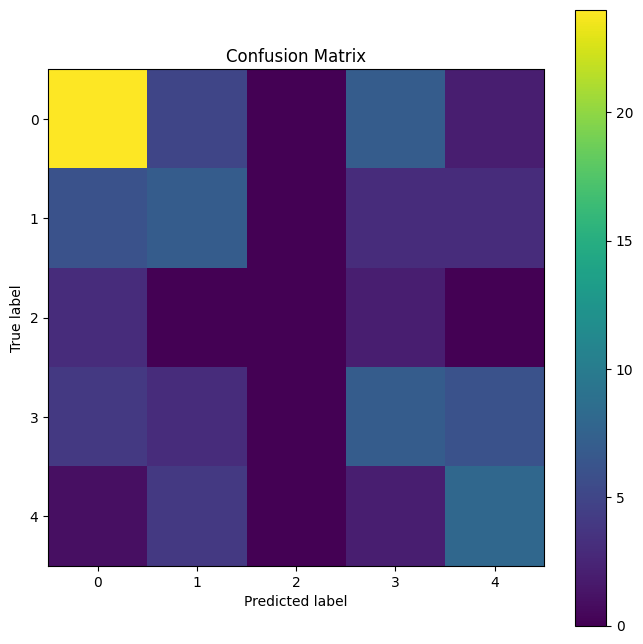

In [5]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)# Shows how many images from each true class were predicted as belonging to each class
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap='viridis')
plt.title('Confusion Matrix')

plt.colorbar()
tick_marks = np.arange(len(set(y_test))) # Use unique labels for tick marks
plt.xticks(tick_marks, set(y_test))
plt.yticks(tick_marks, set(y_test))

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix shows how many instances of a class were correctly classified and incorrectly classified as other classes. The diagonal elements (elements representing correct predictions) are concentrated in the top-left corner. This suggests that the model might be struggling to accurately classify classes with fewer samples. There is also a problem of misclassification, for instance, in the 'Rhino' class, there were instances of the model incorrectly classifying images as Buffalo or Elephant.

As much as we are not using high resolution images for this case, considering the small size of our dataset, I feel like it is okay for us to proceed with Bicubic interpolation for resizing our images. I anticipate that the computing expense will be negligable and we will still be able to preserve the details on our photos after resizing.

Even though our blackbox model requires us to define an input shape for the first convolutional layer, resizing during preprocessing still has a number of benefits:
*   Smaller images require less processing power and memory
*   Different image sizes can lead to inconsistencies in feature extraction



In [6]:
resized_images = []
var= len(labeled_data)
new_width = 256
new_height = 256
for image, label in labeled_data[:var]:
    resized_img = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    # Store the resized images with their labels
    resized_images.append((resized_img, label))

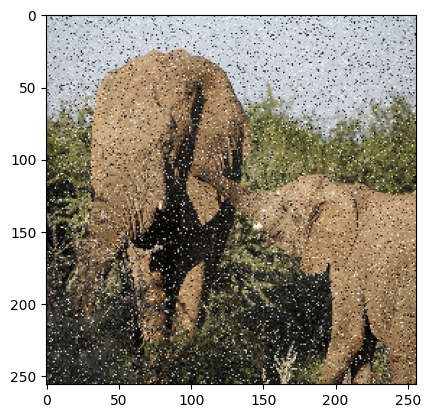

Image shape: (256, 256, 3)


In [7]:
image, label = resized_images[200]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# printing the image shape
print(f"Image shape: {image.shape}")

I took advantage of the small size of the dataset and went through all of the image folders before proceeding with my next step which is performing noise reduction. Upon inspection, I found that only the 'Giraffes' and 'Elephants' folders contained images that were affected by Salt and Pepper noise. Therefore, I decided to use median filtering on these two cases only and to leave the rest of the dataset as it is because applying filters needlessly can lead to blurring and degrading the image quality

In [8]:
filtered_images = []
var= len(resized_images)
for image, label in resized_images[:var]:
    if label == 1 or label == 2: # Applies noise reduction for Elephant and Giraffe classes only
        # Apply Median Filtering
        median_filtered = cv2.medianBlur(image, 3)
        median_filtered = cv2.GaussianBlur(median_filtered, (3, 3), 0)
        filtered_images.append((median_filtered, label))
    else:
        # No filtering needed so append the original image
        filtered_images.append((image, label))

I customized my code to only apply noise reduction to the Elephant and Giraffe classes only. I decided on the kernel size of 3 because it is the smallest kernel size that effectively reduces noise without introducing excessive blurring. I also decided to leave behind the unfiltered label 2 and label 1 photos behind to reduce the risk of image duplicates causing overfitting.

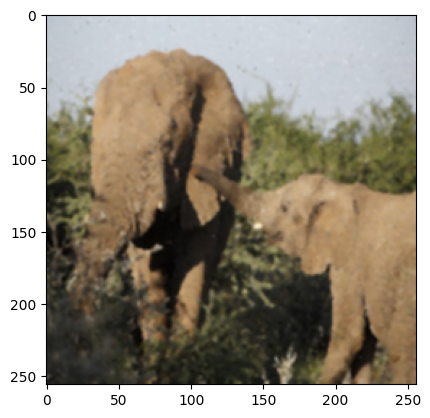

In [9]:
image, label = filtered_images[200]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

The next step I decided to take was to attempt increasing the contrast on my images to make features more distinguishable but that did not yield useful results. The images that were blurry became even more blurry and in addition to that, the methods I attempted CLAHE(Contrast Limited Adaptive Histogram Equalization) and Histogram Equalization both require images to be converted to greyscale. When I set off on this project I made the decision to use color images to train my model so it did not make any sense to add these extra processing steps.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images(image_list):
    augmented_data = []
    augment_count = 2 # This function will perform 2 augmentations per image

    for image, label in image_list:
        # Convert image to 4D tensor
        img = np.expand_dims(image, axis=0)

        # Create an ImageDataGenerator that performs random augmentations on the images
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest'
        )

        # Generate augmented images
        i = 0
        for img_batch in datagen.flow(img, batch_size=1):
            augmented_image = img_batch[0].astype('uint8')
            augmented_data.append((augmented_image, label))
            i += 1
            if i >= augment_count:
                break
        # Append the original image as well
        augmented_data.append((image, label))

    return augmented_data

augmented_data = augment_images(filtered_images)

On my first augmentation attempt I made a function that uses the imageDataGenerator from TensorFlow to perform some random augmentations on each image and store the original image and it's augmented versions with their coresponding labels. This method was a bit computationally demanding but regardless of my small 8GB RAM size, my computer managed to make it through this task.

In [11]:
label_counts = {}
for image, label in augmented_data:
    label_counts[label] = label_counts.get(label, 0) + 1

# Print the label counts
for label, count in label_counts.items():
    print(f"Label {label}: {count} images")

Label 0: 537 images
Label 1: 357 images
Label 2: 81 images
Label 3: 330 images
Label 4: 147 images


I performed 2 augmentations per image because of computational limitations, however, I still found the final image count to be sufficient for the project.

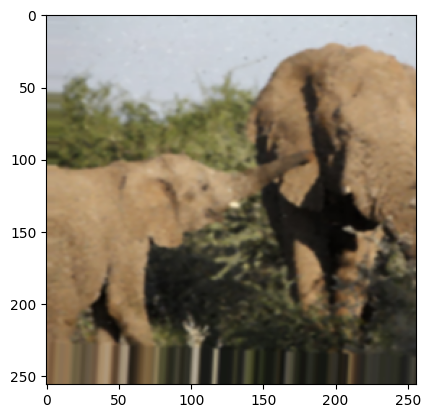

In [12]:
image, label = augmented_data[601]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
normalized_images = []
var= len(augmented_data)
for image, label in augmented_data[:var]:
    normalized_img = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    # Store the normalized images with their labels
    normalized_images.append((normalized_img,label))

My final pre-processing step was to perform normalization on my images, which means rescaling my images to a pixel range between 0 and 1. This is a common pre-processing step that is done to improve computational efficiency and model model convergence during training.

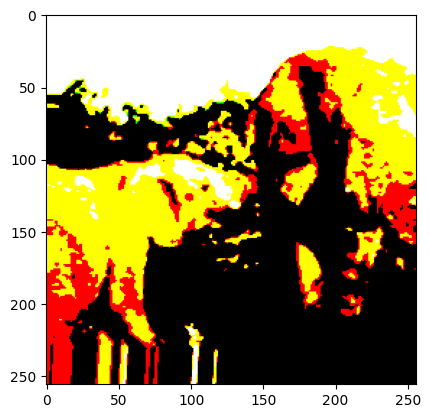

In [14]:
image, label = normalized_images[601]
plt.imshow(cv2.cvtColor((image*255), cv2.COLOR_BGR2RGB))
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 35s 905ms/step - accuracy: 0.2897 - loss: 1.6801 - val_accuracy: 0.1993 - val_loss: 1.7624
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 33s 884ms/step - accuracy: 0.4720 - loss: 1.1528 - val_accuracy: 0.5773 - val_loss: 1.0348
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 883ms/step - accuracy: 0.7198 - loss: 0.6758 - val_accuracy: 0.5567 - val_loss: 1.1591
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 44s 945ms/step - accuracy: 0.8450 - loss: 0.3512 - val_accuracy: 0.5704 - val_loss: 1.2087
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 38s 890ms/step - accuracy: 0.9367 - loss: 0.2003 - val_accuracy: 0.5567 - val_loss: 1.5366
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 41s 886ms/step - accuracy: 0.9693 - loss: 0.0882 - val_accuracy: 0.5773 - val_loss: 1.5132
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 898ms/step - accuracy: 0.9903 - loss: 0.0479 - val_accuracy: 0.6117 - val_loss: 1.9192
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 887ms/step - accuracy: 0.9969 - loss: 0.0220 - val_accu

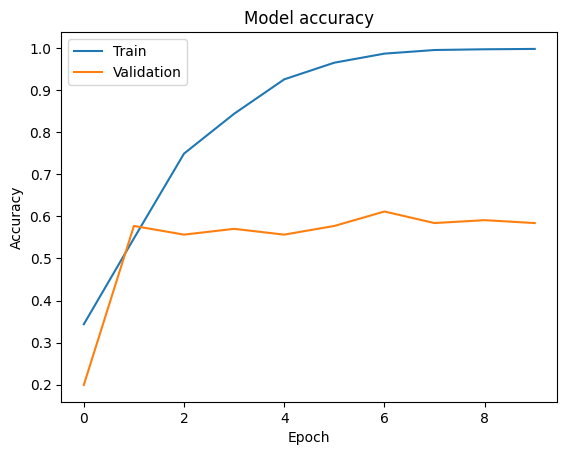

In [15]:
from sklearn.utils.class_weight import compute_class_weight

X, y = zip(*normalized_images)  # Unzip the list of tuples into images (X) and labels (y)
IMG_SIZE = 128

X = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in X]


X = np.array(X) # Convert list of images to a NumPy array
y = np.array(y) # Convert list of labels to a NumPy array

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, y_train: Training data and labels
# X_test, y_test: Testing data and labels

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, class_weights))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))  # Use IMG_SIZE here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with class weights
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights)


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)# Predict the class probabilities for each image in the testing set using the trained model

y_pred_classes = np.argmax(y_pred, axis=1)# Extracts the most likely class label for each image from the predicted class probabilities

# Calculate accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred_classes)) # use the accuracy_score function to calculate the accuracy
print("Classification Report:", classification_report(y_test, y_pred_classes))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step
Accuracy: 0.584192439862543
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.58      0.63       104
           1       0.52      0.74      0.61        72
           2       0.40      0.11      0.17        19
           3       0.49      0.50      0.49        66
           4       0.71      0.73      0.72        30

    accuracy                           0.58       291
   macro avg       0.56      0.53      0.52       291
weighted avg       0.59      0.58      0.57       291



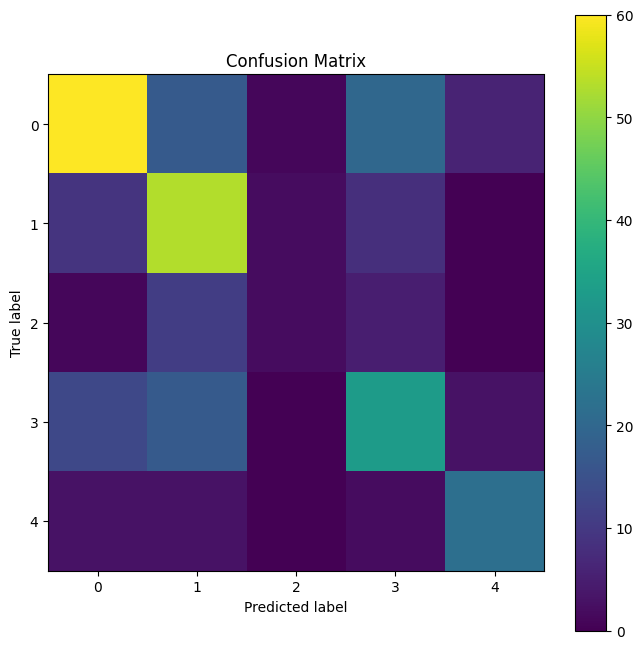

In [17]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)# Shows how many images from each true class were predicted as belonging to each class
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap='viridis')
plt.title('Confusion Matrix')

plt.colorbar()
tick_marks = np.arange(len(set(y_test))) # Use unique labels for tick marks
plt.xticks(tick_marks, set(y_test))
plt.yticks(tick_marks, set(y_test))

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 36.9 MB/s eta 0:00:00


In [19]:
import os
import cv2
import numpy as np
from ultralytics import YOLO

def label_images(root_folder):
    labeled_images = []
    class_counts = {}

    # Load a pre-trained object detection model
    model = YOLO("yolov8m.pt")

    # Get class names from the model
    class_names = model.names

    # Find the indices for "bird" and "person" classes
    class_name_keys = list(class_names.keys())
    bird_index = class_name_keys.index('bird') if 'bird' in class_name_keys else None
    person_index = class_name_keys.index('person') if 'person' in class_name_keys else None

    # Exclude "bird" and "person" from the model's classes
    if bird_index is not None and person_index is not None:
        model.classes = [i for i in range(len(class_names)) if i not in (bird_index, person_index)]

    for folder_name in ["buffalo", "elephants", "giraffes", "rhinos", "zebras"]:
        folder_path = os.path.join(root_folder, folder_name)
        label = 0 if folder_name == "buffalo" else 1 if folder_name == "elephants" else 2 if folder_name == "giraffes" else 3 if folder_name == "rhinos" else 4

        class_counts[folder_name] = 0

        for filename in os.listdir(folder_path):
            if filename.endswith(".txt"):
                continue

            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Error: Could not load image {img_path}")
                continue

            # Perform object detection
            results = model(img, conf=0.85)

            # Process detections, filtering out "bird" and "person"
            if results[0].boxes.xyxy is not None and len(results[0].boxes.xyxy) > 0:
                boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

                for box, cls in zip(boxes, results[0].boxes.cls.cpu().numpy().astype(int)):  # Get class for each box

                   if cls not in (bird_index, person_index):  # Check if class is not bird or person
                        x1, y1, x2, y2 = box
                        cropped_img = img[y1:y2, x1:x2]
                        labeled_images.append((cropped_img, label))
                        class_counts[folder_name] += 1

            # Append the original image with the folder label
            labeled_images.append((img, label))
            class_counts[folder_name] += 1

    # Print the class counts
    for class_name, count in class_counts.items():
        print(f"{class_name}: {count} images")

    return labeled_images

root_folder = "/content/drive/MyDrive/WildAfrica/WildAfrica"
labeled_data = label_images(root_folder)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 128MB/s]



0: 448x640 2 cows, 2470.2ms
Speed: 7.2ms preprocess, 2470.2ms inference, 32.7ms postprocess per image at shape (1, 3, 448, 640)

0: 352x640 1 cow, 2542.3ms
Speed: 3.9ms preprocess, 2542.3ms inference, 8.9ms postprocess per image at shape (1, 3, 352, 640)

0: 448x640 (no detections), 2739.2ms
Speed: 3.5ms preprocess, 2739.2ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 cow, 910.4ms
Speed: 5.2ms preprocess, 910.4ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 (no detections), 996.2ms
Speed: 4.9ms preprocess, 996.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 (no detections), 818.2ms
Speed: 4.5ms preprocess, 818.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 512x640 1 cow, 1077.2ms
Speed: 4.1ms preprocess, 1077.2ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)

0: 448x640 1 bird, 935.1ms
Speed: 5.5ms preprocess, 935.1ms inference, 1.1ms postpro

I decided to have another go at improving my model to see if I can manage a higher accuracy score. On my third and final attempt at training my CNN model, I decided to try using the object detection model YOLOv8 to detect objects in my images, assign boounding boxes to them and crop them. This was because I felt that the presence of multiple animals in the images was increasing the complexity of the task, which was then leading to poor performance by my model.

Loading the images and passing them through the model straight away was a bit computationally expensive but manageable. I made certain modifications to the code to increase efficiency; when carrying out detections, the model should ignore instances of birds and persons, the model should skip .txt files present in the dataset folders and I also increased the confidence threshold up to 0.8 after a bit of experimentation to avoid the model cropping out irrelevant objects. I also decided to keep the original photos because I felt that they could provide useful cues for the model in training.

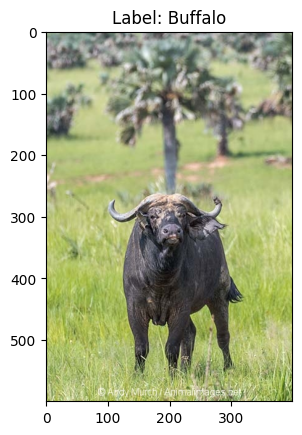

Image shape: (600, 400, 3)


In [20]:
import matplotlib.pyplot as plt

image, label = labeled_data[300]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if label == 0:
    plt.title("Label: Buffalo")
elif label == 1:
    plt.title("Label: Elephant")
elif label == 2:
    plt.title("Label: Giraffe")
elif label == 3:
    plt.title("Label: Rhino")
elif label == 4:
    plt.title("Label: Zebra")
plt.show()
# printing the image shape
print(f"Image shape: {image.shape}")

It looks like the model worked well. Setting a high confidence threshold paid off because, for example in this image, there are plenty of Buffalo in the image but it only crops out the objects that it can capture clearly and that is good for our dataset because we won't be introducing any noise.

In [21]:
def pre_process_images(image_list, new_width, new_height, filter_classes=[1, 2]):
    preprocessed_images = []

    for image, label in image_list:
        # Resize the image
        resized_img = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

        # Apply noise reduction for specified classes
        if label in filter_classes:
            resized_img = cv2.medianBlur(resized_img, 3)
            resized_img = cv2.GaussianBlur(resized_img, (3, 3), 0)

        preprocessed_images.append((resized_img, label))

    return preprocessed_images

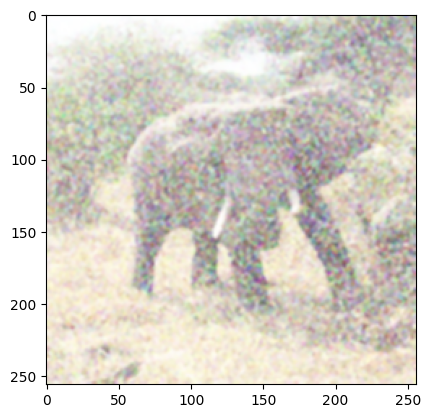

In [22]:
prep_images = pre_process_images(labeled_data, 256, 256)
image, label = prep_images[410]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def augment_images(image_list):
    augmented_data = []
    augment_count = 1

    # Iterate over images and labels
    for image, label in image_list:
        # Convert image to 4D tensor
        img = np.expand_dims(image, axis=0)

        # Create an ImageDataGenerator
        datagen = ImageDataGenerator(
            rotation_range=20,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            vertical_flip=True,
            fill_mode='nearest'
        )

        # Generate augmented images
        image_count = 0
        for img_batch in datagen.flow(img, batch_size=1):
            augmented_image = img_batch[0].astype('uint8')
            augmented_data.append((augmented_image, label))
            image_count += 1
            if image_count >= augment_count:
                break

    # Append original images
    augmented_data.extend(image_list)

    return augmented_data

augmented_data = augment_images(prep_images)

In [24]:
label_counts = {}
for image, label in augmented_data:
    label_counts[label] = label_counts.get(label, 0) + 1

# Print the label counts
for label, count in label_counts.items():
    print(f"Label {label}: {count} images")

Label 0: 692 images
Label 1: 594 images
Label 2: 120 images
Label 3: 362 images
Label 4: 274 images


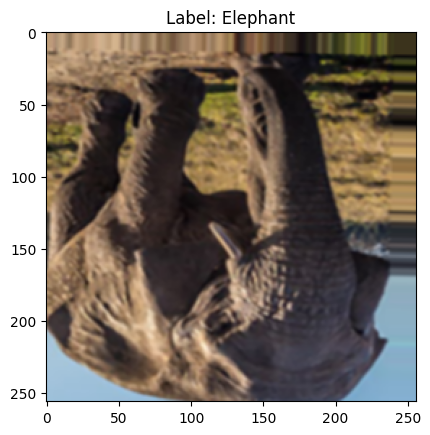

In [25]:
image, label = augmented_data[622]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if label == 0:
    plt.title("Label: Buffalo")
elif label == 1:
    plt.title("Label: Elephant")
elif label == 2:
    plt.title("Label: Giraffe")
elif label == 3:
    plt.title("Label: Rhino")
elif label == 4:
    plt.title("Label: Zebra")
plt.show()


In [26]:
normalized_images = []
var= len(augmented_data)
for image, label in augmented_data[:var]:
    normalized_img = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    # Store the normalized images with their labels
    normalized_images.append((normalized_img,label))

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 48s 893ms/step - accuracy: 0.2492 - loss: 1.8460 - val_accuracy: 0.5403 - val_loss: 1.1625
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 893ms/step - accuracy: 0.5634 - loss: 1.1344 - val_accuracy: 0.5330 - val_loss: 1.0937
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 47s 904ms/step - accuracy: 0.7016 - loss: 0.7578 - val_accuracy: 0.5208 - val_loss: 1.2469
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 898ms/step - accuracy: 0.8456 - loss: 0.4299 - val_accuracy: 0.6137 - val_loss: 1.0965
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 84s 945ms/step - accuracy: 0.9365 - loss: 0.2044 - val_accuracy: 0.5941 - val_loss: 1.4473
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 928ms/step - accuracy: 0.9522 - loss: 0.1219 - val_accuracy: 0.6064 - val_loss: 1.5805
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 47s 909ms/step - accuracy: 0.9949 - loss: 0.0247 - val_accuracy: 0.6284 - val_loss: 1.6512
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 82s 893ms/step - accuracy: 0.9972 - loss: 0.0179 - val_accu

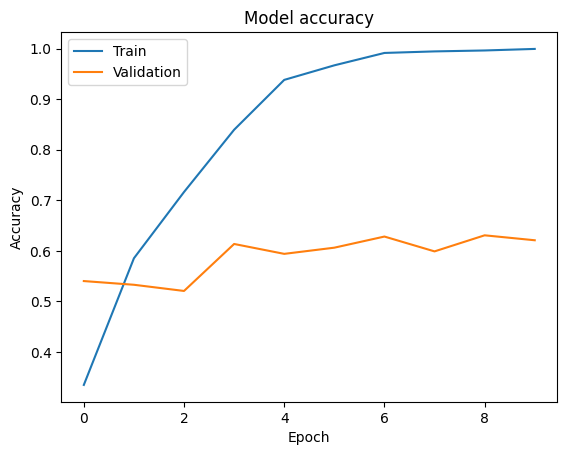

In [28]:
from sklearn.utils.class_weight import compute_class_weight

X, y = zip(*normalized_images)  # Unzip the list of tuples into images (X) and labels (y)
IMG_SIZE = 128

X = [cv2.resize(img, (IMG_SIZE, IMG_SIZE)) for img in X]

X = np.array(X) # Convert list of images to a NumPy array
y = np.array(y) # Convert list of labels to a NumPy array

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, y_train: Training data and labels
# X_test, y_test: Testing data and labels

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, class_weights))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))  # Use IMG_SIZE here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with class weights
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    class_weight=class_weights)


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)# Predict the class probabilities for each image in the testing set using the trained model

y_pred_classes = np.argmax(y_pred, axis=1)# Extracts the most likely class label for each image from the predicted class probabilities

# Calculate accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred_classes)) # use the accuracy_score function to calculate the accuracy
print("Classification Report:", classification_report(y_test, y_pred_classes))

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step
Accuracy: 0.6210268948655256
Classification Report:               precision    recall  f1-score   support

           0       0.66      0.66      0.66       137
           1       0.65      0.75      0.70       124
           2       0.31      0.26      0.29        19
           3       0.36      0.26      0.31        68
           4       0.75      0.77      0.76        61

    accuracy                           0.62       409
   macro avg       0.55      0.54      0.54       409
weighted avg       0.61      0.62      0.61       409



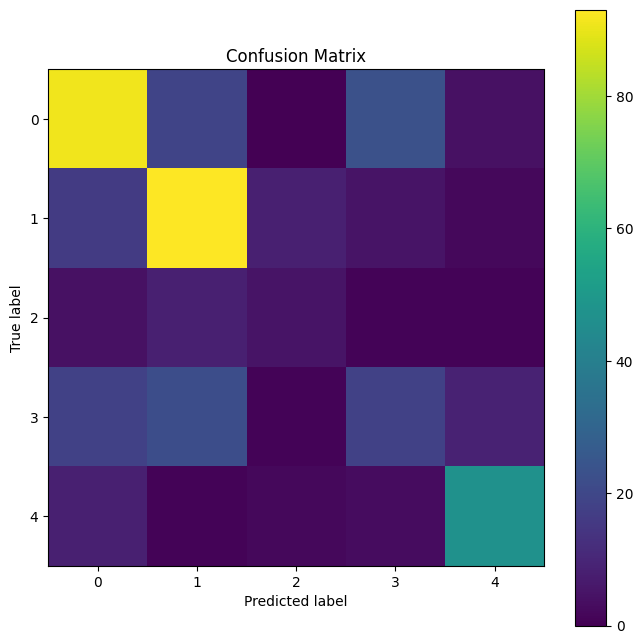

In [30]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)# Shows how many images from each true class were predicted as belonging to each class
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap='viridis')
plt.title('Confusion Matrix')

plt.colorbar()
tick_marks = np.arange(len(set(y_test))) # Use unique labels for tick marks
plt.xticks(tick_marks, set(y_test))
plt.yticks(tick_marks, set(y_test))

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()